images contain data
display images using matplotlib

(427, 640, 3)


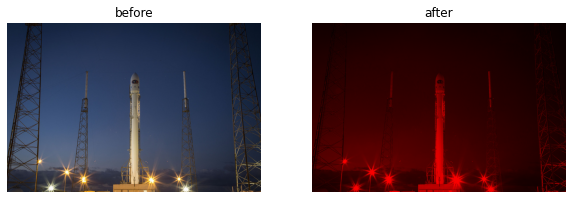

In [3]:
#we can images by changin the array data

from skimage import data
import matplotlib.pyplot as plt


original_image = data.rocket()
red_image = data.rocket()

print(original_image.shape)
red_image[:, :, 1]  = 0 #green color to 0
red_image[:, :, 2] = 0 #blue also

def show_image(before, after):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))
  ax1.imshow(before)
  ax1.set_title("before")
  ax1.axis("off")
  ax2.imshow(after)
  ax2.set_title("after")
  ax2.axis("off")

#the img is completely red
# means its contain the information in the red channel
show_image(original_image, red_image)

we might change the image to have full intensity in the green channel for example

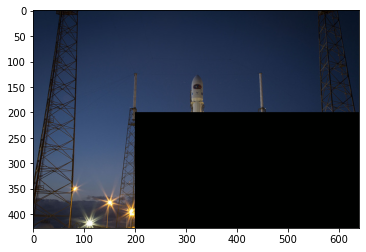

In [5]:
original_image[200:1200, 200:1200, :] = [0, 1, 0]
plt.imshow(original_image)
#the result is an image with a green square in it

what computer sees is the number that represents instensities of pixels
hight number part of the images that are brighter, while low represents darker parts

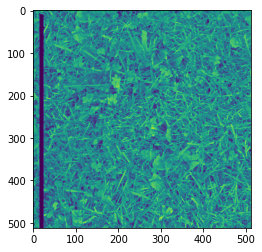

In [10]:
grass_img = data.grass()
plt.imshow(grass_img)
grass_img[10:2000, 15:25] = 0 #change part of array using assignmet
plt.imshow(grass_img)

#ex1
Images as data: visualizations

To display image data, you will rely on Python's Matplotlib library, and specifically use matplotlib's pyplot sub-module, that contains many plotting commands. Some of these commands allow you to display the content of images stored in arrays.

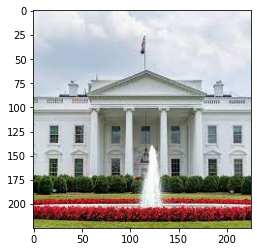

(225, 225, 3)


In [13]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('/content/drive/MyDrive/dataCamp/computervision/data/téléchargement.jpeg')

# Display the image
plt.imshow(data)
plt.show()
print(data.shape)

#ex2
mages as data: changing images

To modify an image, you can modify the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

The image you imported in the previous exercise is available in 

Modify the bricks image to replace the top left corner of the image (10 by 10 pixels) into a red square.
Visualize the resulting image.

In [ ]:
# Set the red channel in this part of the image to 1
#data[:10, :10, 0] = 1

# Set the green channel in this part of the image to 0
data[:10, :10, 1] = 0

# Set the blue channel in this part of the image to 0
data[:10, :10, 2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

#classifing images
having images of 3 different classes: dresses, t-shirts, and shoes, we'd like to build an algorithm to distinguish between them
the algorithm mill learn patters in the images that distinguish them
at the end, we'd like to know how the classifier does

#ex2
Using one-hot encoding to represent images

Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:

Shirts
Dresses
Shoes
In this exercise, you will create a one-hot encoding of a small sample of these labels.

In [20]:
import numpy as np

classes = np.array(["shoe", "shirt", "shoe", "shirt", "dress", "shoe", "dress", "dress"])
categories =np.unique(classes) 
n_categories =len(categories)
one_hotMatrix= np.zeros((len(classes), n_categories))
for i in range(len(classes)):
  j = np.where(classes[i]== categories)
  one_hotMatrix[i, j]=1
print(one_hotMatrix)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


Evaluating a classifier

To evaluate a classifier, we need to test it on images that were not used during training. This is called "cross-validation": a prediction of the class (e.g., t-shirt, dress or shoe) is made from each of the test images, and these predictions are compared with the true labels of these images.

The results of cross-validation are provided as one-hot encoded arrays: test_labels and predictions

In [ ]:
# Calculate the number of correct predictions
number_correct = (test_labels*predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

first layer is connected to all pixels in the input image
training data are iamges of clothes
more units will increase the complexity of the network and its capacity  to represent inputs 
to facilitate learning, we're using a relu as activation 

the model will expect samples to be rows in an array, and each column represent a pixel in the image, so      

In [ ]:
 from keras.layers import Dense
 model.add(Dense(10, actiavtion="relu", input_shape=(784,)))
 model.add(Dense(10, activation="relu"))
  #the output of our network is a fully connected layer with a unit for each class
 model.add(Dense(3, activation="softmax"))
 #the output units uses a softmax to decied which of the three classes was presented

 #next we compile the model and choose an optimizer
 model.compilte(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

 model.fit(train_data, train_labels, validation_split=.2, epochs=3)
 #the network adjusts its weights through backpropagation and gradient descent
 #going to the data several times until the network can accurately classify the images. 
 #  3 epochs means the model will go over all of the trainig data 3 times

#how do we know that the algorith reached  a good set of weights ?
we worry about overfitting, so to avoid it, we set aside a set of validation images
and at the end of training, we'll test the model on the validation test
Another evalutation of the model should be done on a separate test set that was not used during training

In [ ]:
 model.evaluate(test_data, test_labels)

#ex4
# Calculate the number of correct predictions
number_correct = (test_labels*predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

In [ ]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation="relu", input_shape=(784,)))

# Second layer
model.add(Dense(10, activation="relu"))

# Output layer
model.add(Dense(3, activation="softmax"))

#ex5
Compile a neural network

Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list ['accuracy'] to the metrics keyword argumen

In [ ]:
# Compile the model
model.compile(optimizer="adam", 
           loss="categorical_crossentropy", 
           metrics=['accuracy'])

#ex6

In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: train_data that contains the pixel data for 50 images of the three clothing classes and train_labels, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.

The model you compiled in the previous exercise, and train_data and train_labels are available in your workspace.

In [ ]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1]**2)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Cross-validation for neural network evaluation

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

The model you fit in the previous exercise, and test_data and test_labels are available in your workspace

In [ ]:
# Reshape test data
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1]**2)

# Evaluate the model
model.evaluate(test_data, test_labels) 